# Feature matching using SIFT with OpenCV

In this case, we will look correspondences between features of two images using the computer vision open source library [OpenCV](https://opencv.org/). The idea is to use the feature detector and descriptor SIFT (Scale-Invariant Feature Transform) that allow us to calculate interest points that apart to be invariant to rotation, like Harris detector, it's invariant to scale.

For this example, we will use the following images:

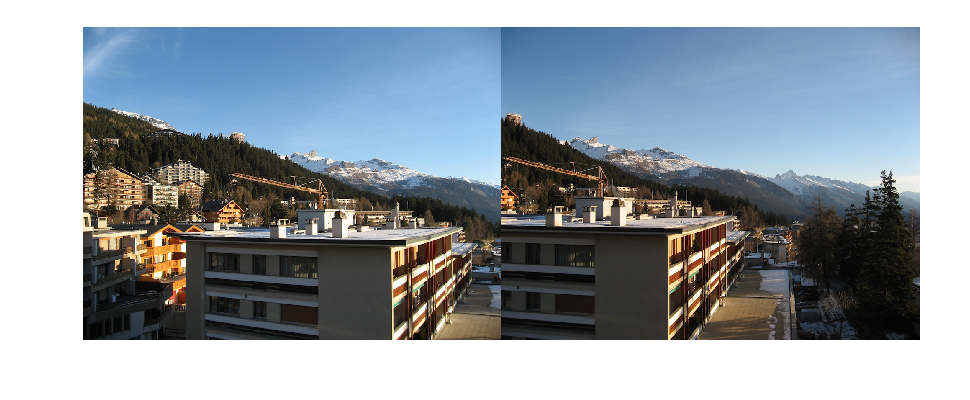

In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

im1 = cv2.imread('Data/crans_1_small.jpg')
im2 = cv2.imread('Data/crans_2_small.jpg')

plt.figure(dpi=180)
plt.imshow(np.hstack([im1,im2])[...,::-1]), plt.axis('off')
plt.show()

To use the features that OpenCV offers us, we must first make a SIFT object.

In [2]:
sift = cv2.xfeatures2d.SIFT_create(1000)

We've created the SIFT object specifying that we'll calculate 1000 points. Now, converting images to grayscale and detecting feature points and its respective descriptors:

In [3]:
img1 = cv2.cvtColor(im1,cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(im2,cv2.COLOR_BGR2GRAY)

kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

We can show the points with the function *drawKeypoints*, being the arguments the image, key points detected, the output image (in this case set empty *None*) and a tuple with RGB points colors.

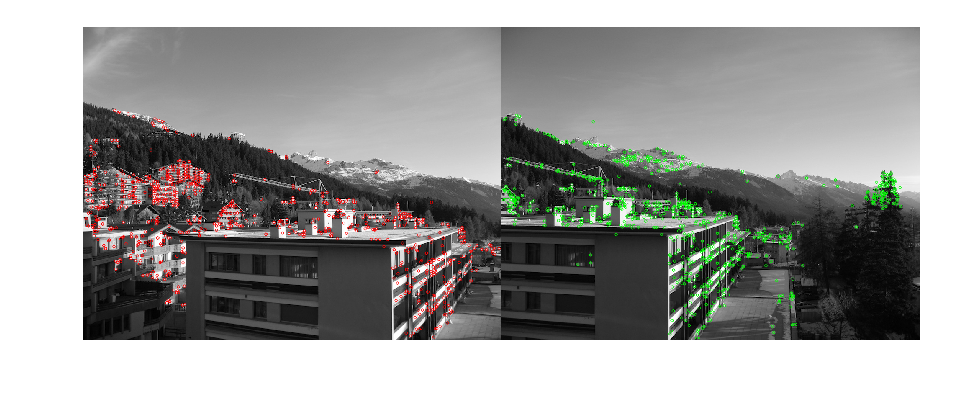

In [4]:
kpim1 = cv2.drawKeypoints(img1,kp1,None,(0,0,255))
kpim2 = cv2.drawKeypoints(img2,kp2,None,(0,255,0))


plt.figure(dpi=180)
plt.imshow(np.hstack([kpim1,kpim2])[...,::-1]), plt.axis('off')
plt.show()

To make the matching using the descriptors calculated above, OpenCV offers us two methodologies: the Brute Force matching and the FLANN algorithm. In this case, we let's use the Brute Force (BF) matching. To use it is necessary to create a BF object.

In [5]:
bf = cv2.BFMatcher()

Using *knnMatch* function to to get $k$ best matches setting $k=2$ so that we can apply ratio test explained by Lowe in his [paper](https://link.springer.com/article/10.1023%2FB%3AVISI.0000029664.99615.94) in section 7.1:

In [6]:
matches = bf.knnMatch(des1,des2,k=2)

#Ratio test
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append([m])

Finally showing the matches features computed:

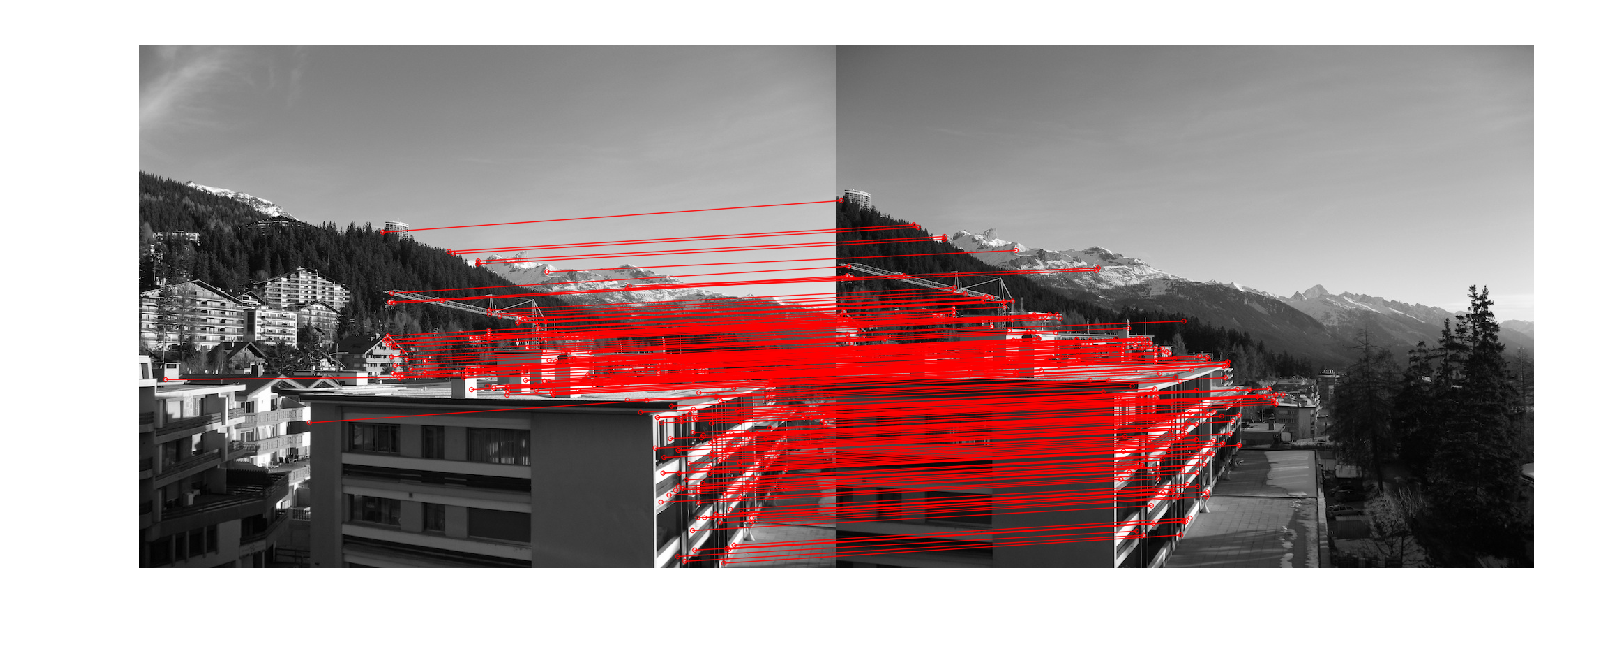

In [7]:
im = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,(0,0,255),flags=2)

plt.figure(dpi=300)
plt.imshow(im[...,::-1]), plt.axis('off')
plt.show()